In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:12<00:00, 186MB/s]
100% 2.70G/2.70G [00:12<00:00, 225MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


##AlexNet

In [ ]:
alexnet_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
alexnet_model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
ep = 7
history = alexnet_model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/7
2197/2197 [==============================] - 172s 78ms/step - loss: 1.2700 - accuracy: 0.6537 - val_loss: 2.0570 - val_accuracy: 0.5140
Epoch 2/7
2197/2197 [==============================] - 170s 77ms/step - loss: 0.4802 - accuracy: 0.8568 - val_loss: 0.7053 - val_accuracy: 0.7981
Epoch 3/7
2197/2197 [==============================] - 171s 78ms/step - loss: 0.3134 - accuracy: 0.9053 - val_loss: 1.6235 - val_accuracy: 0.6353
Epoch 4/7
2197/2197 [==============================] - 171s 78ms/step - loss: 0.2455 - accuracy: 0.9263 - val_loss: 1.3509 - val_accuracy: 0.7062
Epoch 5/7
2197/2197 [==============================] - 170s 77ms/step - loss: 0.1912 - accuracy: 0.9422 - val_loss: 0.7938 - val_accuracy: 0.8105
Epoch 6/7
2197/2197 [==============================] - 170s 77ms/step - loss: 0.1516 - accuracy: 0.9548 - val_loss: 0.9234 - val_accuracy: 0.7721
Epoch 7/7
2197/2197 [==============================] - 171s 78ms/step - loss: 0.1281 - accuracy: 0.9616 - val_loss: 0.6993 -

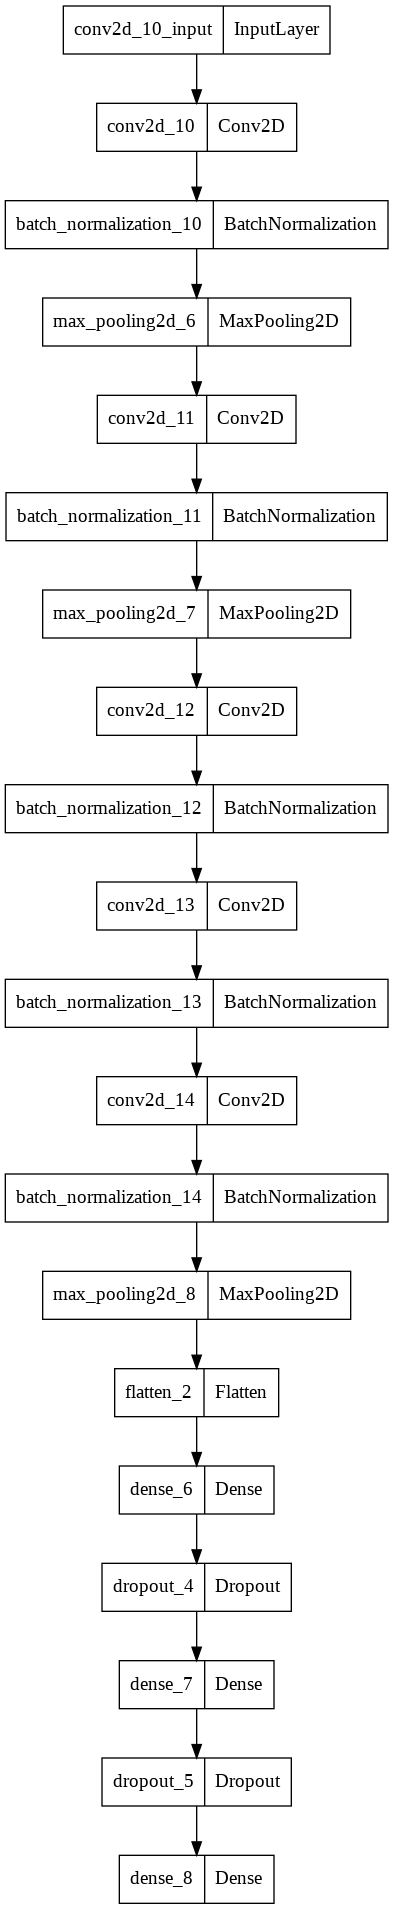

In [ ]:
tf.keras.utils.plot_model(
    alexnet_model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

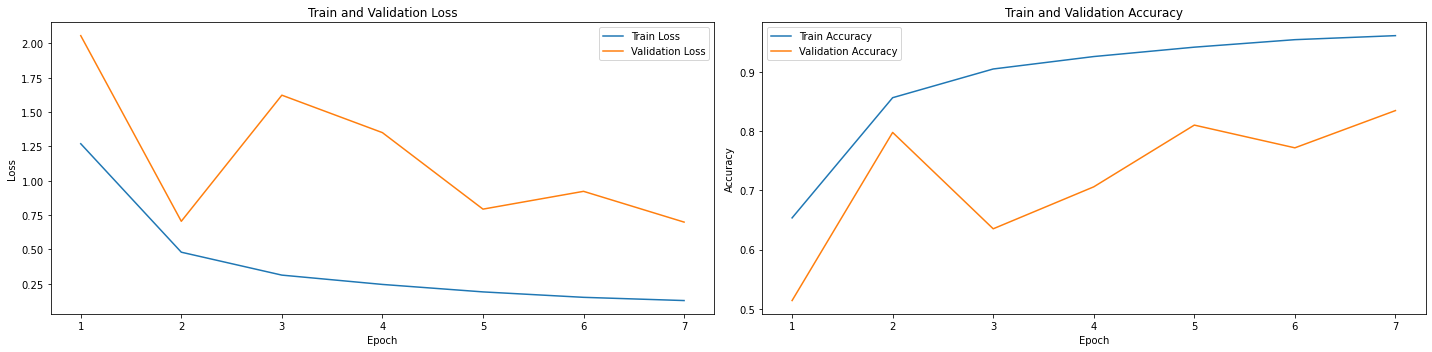

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,8),history.history['loss'],label="Train Loss")
plt.plot(range(1,8),history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,8),history.history['accuracy'], label="Train Accuracy")
plt.plot(range(1,8),history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(alexnet_model.predict(x),1).numpy())

In [ ]:
print(labels)

[[17, 8, 35, 1, 7, 9, 18, 8, 7, 19, 3, 27, 12, 1, 30, 7, 12, 13, 9, 6, 33, 32, 24, 13, 10, 30, 8, 30, 12, 10, 34, 35], [6, 22, 4, 17, 24, 24, 14, 35, 2, 17, 13, 29, 26, 14, 27, 14, 4, 27, 6, 32, 7, 16, 4, 1, 9, 22, 21, 37, 26, 27, 4, 32], [17, 16, 35, 23, 17, 13, 23, 34, 30, 6, 36, 8, 24, 3, 28, 16, 28, 22, 4, 2, 21, 14, 17, 20, 8, 36, 0, 22, 20, 6, 33, 23], [27, 19, 31, 10, 0, 10, 22, 10, 14, 23, 2, 12, 35, 21, 13, 25, 17, 33, 32, 27, 37, 21, 4, 37, 13, 20, 24, 7, 5, 7, 7, 16], [27, 37, 22, 1, 8, 37, 27, 19, 3, 22, 33, 8, 18, 23, 13, 8, 12, 21, 31, 19, 12, 14, 5, 3, 32, 20, 34, 32, 26, 7, 5, 24], [14, 10, 13, 31, 31, 32, 37, 12, 27, 32, 23, 19, 19, 10, 16, 21, 19, 28, 18, 0, 11, 2, 28, 2, 5, 25, 34, 37, 23, 25, 13, 9], [7, 14, 10, 22, 4, 16, 19, 10, 33, 12, 27, 34, 2, 11, 25, 0, 17, 29, 19, 8, 19, 1, 10, 30, 8, 35, 5, 1, 9, 21, 2, 25], [6, 11, 27, 0, 3, 18, 25, 5, 22, 1, 32, 27, 22, 22, 8, 3, 6, 35, 32, 4, 2, 27, 14, 10, 24, 32, 29, 15, 12, 19, 14, 11], [14, 14, 11, 32, 2, 5, 28, 35, 

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 96.16 %
Test Accuracy   : 83.50 %
Precision Score : 83.50 %
Recall Score    : 83.50 %


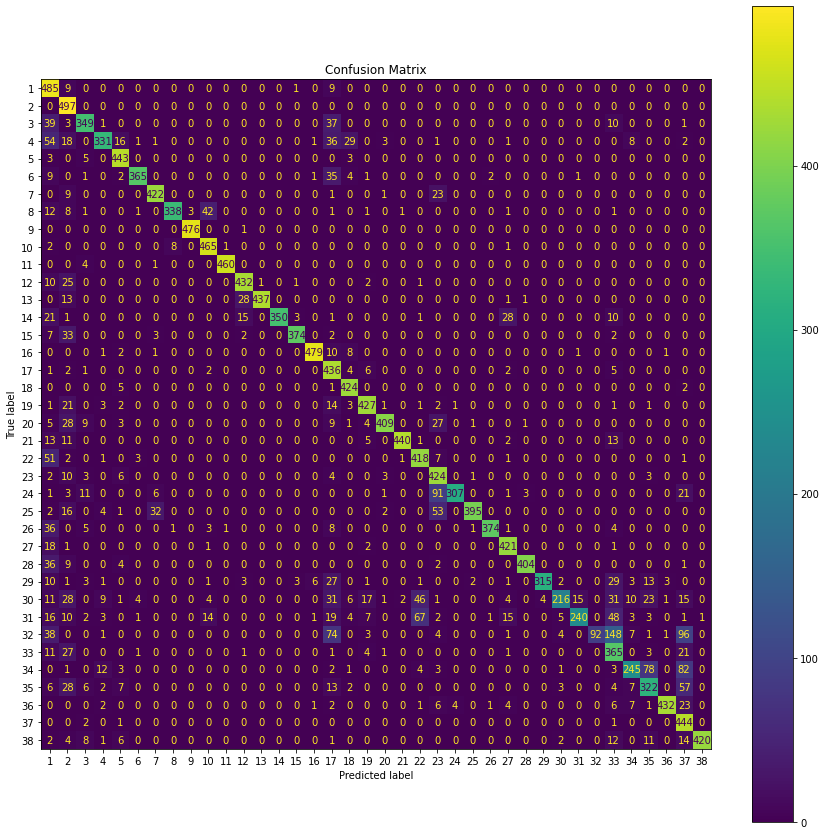

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()